In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import  matplotlib.pyplot as plt
import seaborn as sns
from pandas import get_dummies

In [2]:
data = pd.read_csv('dataset.csv')
# dropping the school columns as it may induce bias
data.drop(['school'], axis=1, inplace=True)

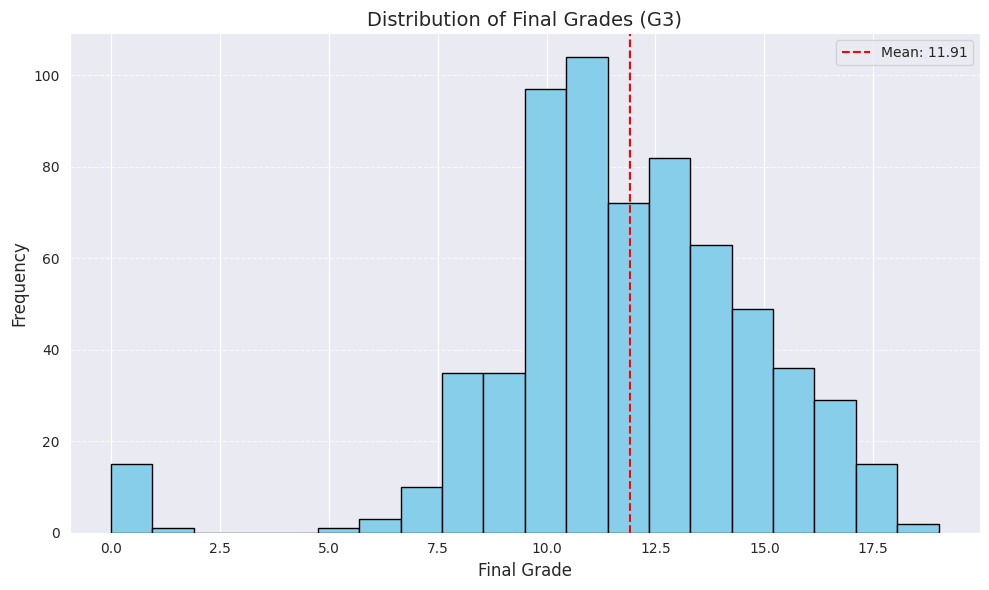

In [3]:
# Distribution of final grades (G3)
# This histogram visualizes the distribution of students' final grades (G3).
# It shows the frequency of each grade value, highlighting how grades are distributed across the student population.
# The red dashed line indicates the mean grade, providing context for the central tendency of the distribution.
# This visualization helps identify if grades follow a normal distribution or if there are any skews or unusual patterns.
plt.figure(figsize=(10, 6))
plt.hist(data['G3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)', fontsize=14)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.axvline(data['G3'].mean(), color='red', linestyle='--', label=f'Mean: {data["G3"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

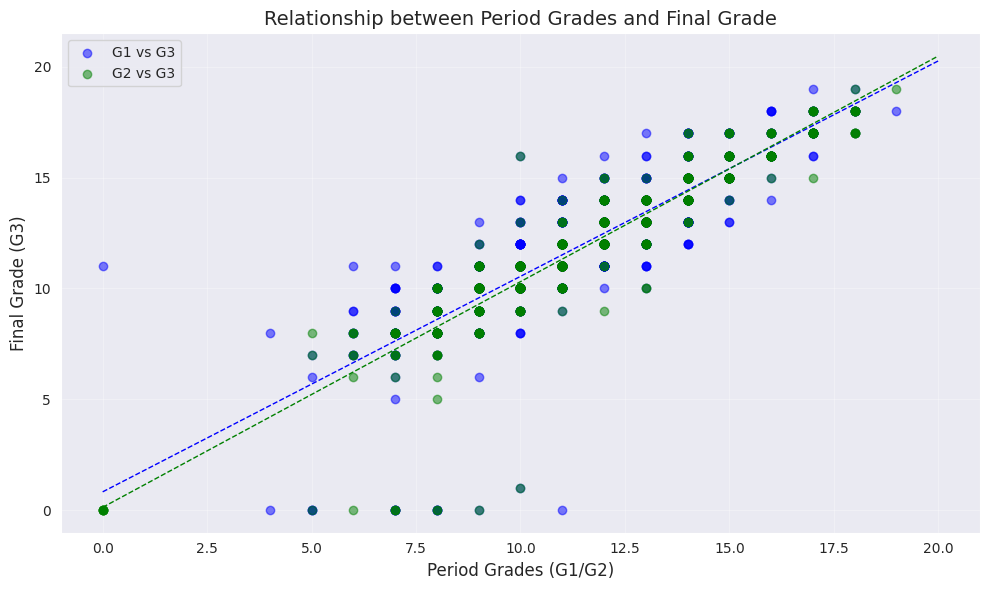

Correlation between grades:
          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


In [4]:
# Grade progression from G1 to G3
# This scatter plot examines the relationship between period grades (G1 and G2) and the final grade (G3).
# Blue points represent the relationship between first period grades (G1) and final grades (G3).
# Green points represent the relationship between second period grades (G2) and final grades (G3).
# Dashed lines show the linear regression trends for both relationships.
# This visualization helps understand how early performance predicts final outcomes and
# whether improvement or decline occurs throughout the academic periods.
plt.figure(figsize=(10, 6))
plt.scatter(data['G1'], data['G3'], alpha=0.5, color='blue', label='G1 vs G3')
plt.scatter(data['G2'], data['G3'], alpha=0.5, color='green', label='G2 vs G3')

# Add regression lines
g1_coef = np.polyfit(data['G1'], data['G3'], 1)
g2_coef = np.polyfit(data['G2'], data['G3'], 1)
x_range = np.linspace(0, 20, 100)
plt.plot(x_range, g1_coef[0] * x_range + g1_coef[1], 'b--', linewidth=1)
plt.plot(x_range, g2_coef[0] * x_range + g2_coef[1], 'g--', linewidth=1)

plt.title('Relationship between Period Grades and Final Grade', fontsize=14)
plt.xlabel('Period Grades (G1/G2)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlations and display
grade_corr = data[['G1', 'G2', 'G3']].corr()
print("Correlation between grades:")
print(grade_corr)

/tmp/ipykernel_7134/2621829210.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3', data=data, palette={'F': 'pink', 'M': 'lightblue'})


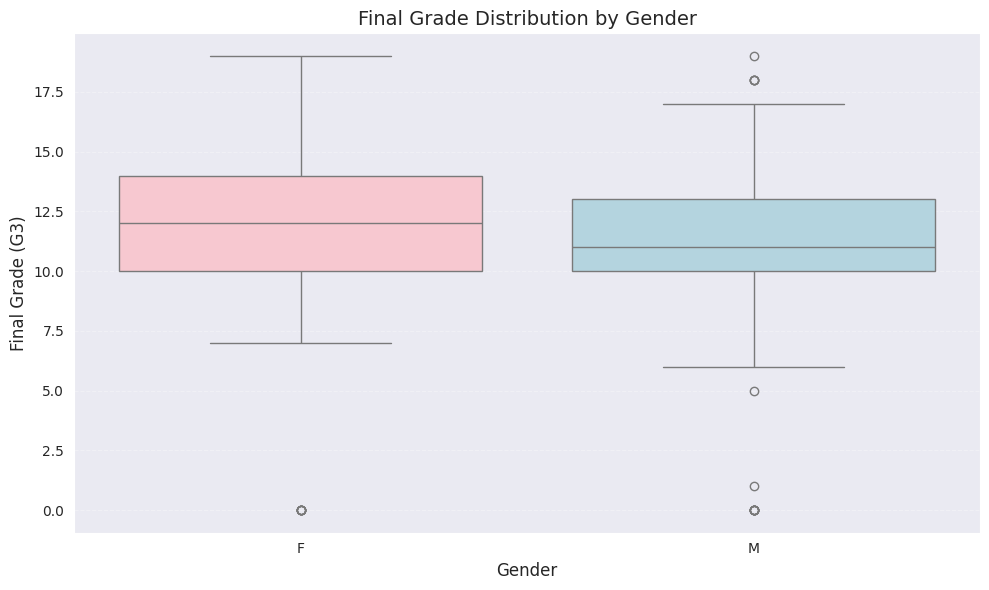

/tmp/ipykernel_7134/2621829210.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=gender_means, palette={'F': 'pink', 'M': 'lightblue'})


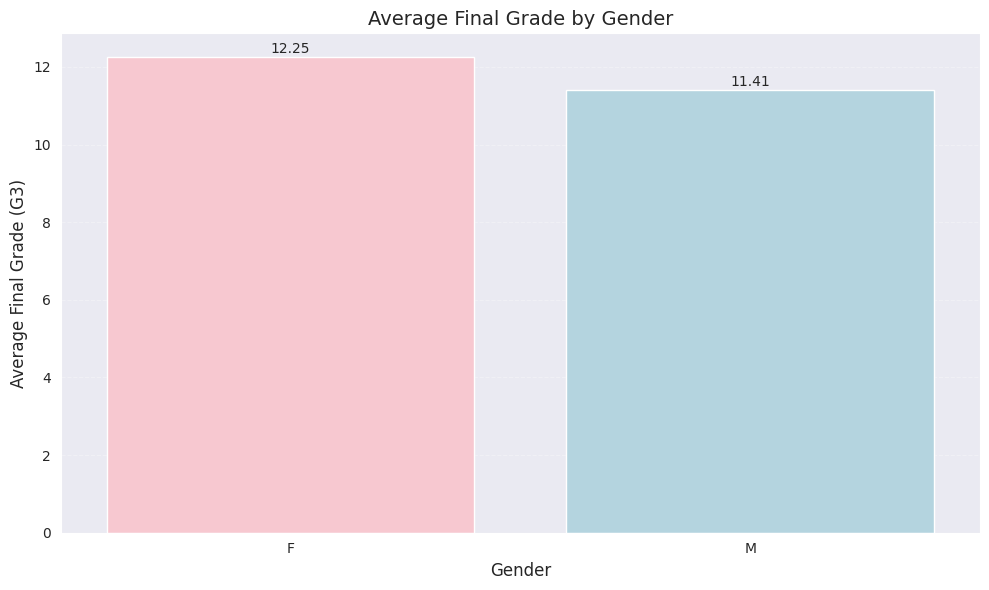

In [5]:
# Gender comparison of final grades
# This section contains two visualizations that analyze the relationship between gender and academic performance:
# 1. A boxplot showing the distribution of final grades (G3) for each gender
#    - Displays the median, quartiles, and potential outliers for male and female students
#    - Helps identify if there are significant differences in grade distributions between genders
# 2. A bar chart showing the average final grade by gender
#    - Provides a clear comparison of mean performance between male and female students
#    - Includes exact average values labeled on each bar for precise comparison
# Together, these visualizations help assess if gender is associated with differences in academic achievement.
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=data, palette={'F': 'pink', 'M': 'lightblue'})
plt.title('Final Grade Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Add group means as a bar chart
plt.figure(figsize=(10, 6))
gender_means = data.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=gender_means, palette={'F': 'pink', 'M': 'lightblue'})
plt.title('Average Final Grade by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(gender_means['G3']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

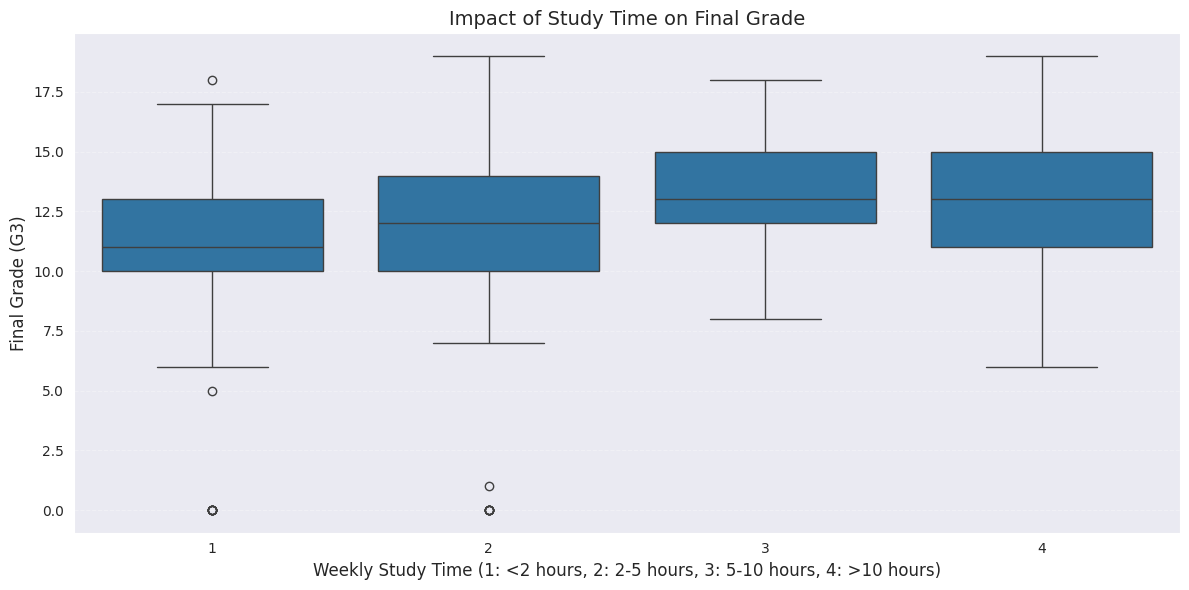

In [6]:
# Import seaborn for better visualization
import seaborn as sns

# Study time vs grades
# This boxplot visualizes the relationship between weekly study time and final grades (G3).
# The x-axis represents different categories of weekly study time:
#   1: less than 2 hours
#   2: 2-5 hours
#   3: 5-10 hours
#   4: more than 10 hours
# For each study time category, the boxplot shows:
#   - The median final grade (horizontal line in the box)
#   - The interquartile range (the box itself)
#   - The range of grades (the whiskers)
#   - Any outliers (individual points)
# This visualization helps identify if increased study time correlates with better academic performance
# and at what point additional study time may yield diminishing returns.
plt.figure(figsize=(12, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Impact of Study Time on Final Grade', fontsize=14)
plt.xlabel('Weekly Study Time (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


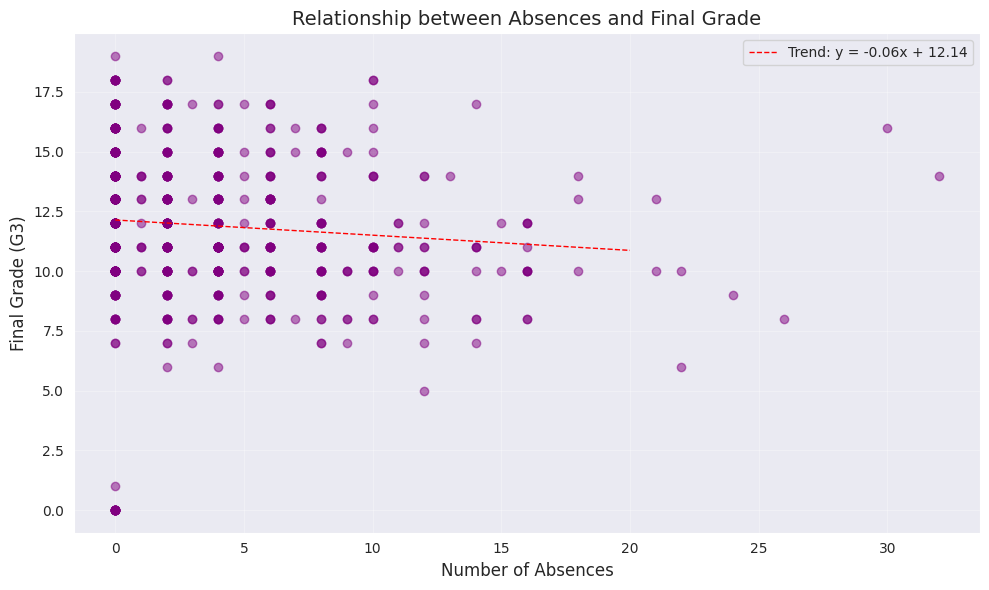

In [7]:
# Absences vs final grade
# This scatter plot examines the relationship between student absences and final grades (G3).
# Each point represents a student, with:
#   - X-axis: Number of absences throughout the academic period
#   - Y-axis: Final grade achieved (G3)
# The red dashed line shows the linear trend between absences and grades.
# The trend line equation is displayed in the legend, showing the slope and intercept.
# This visualization helps determine if there's a negative correlation between absences and academic performance,
# and quantifies how much each absence might impact the expected final grade on average.
plt.figure(figsize=(10, 6))
plt.scatter(data['absences'], data['G3'], alpha=0.5, c='purple')
plt.title('Relationship between Absences and Final Grade', fontsize=14)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(alpha=0.3)

# Add trend line
abs_coef = np.polyfit(data['absences'], data['G3'], 1)
plt.plot(x_range, abs_coef[0] * x_range + abs_coef[1], 'r--', linewidth=1,
         label=f'Trend: y = {abs_coef[0]:.2f}x + {abs_coef[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

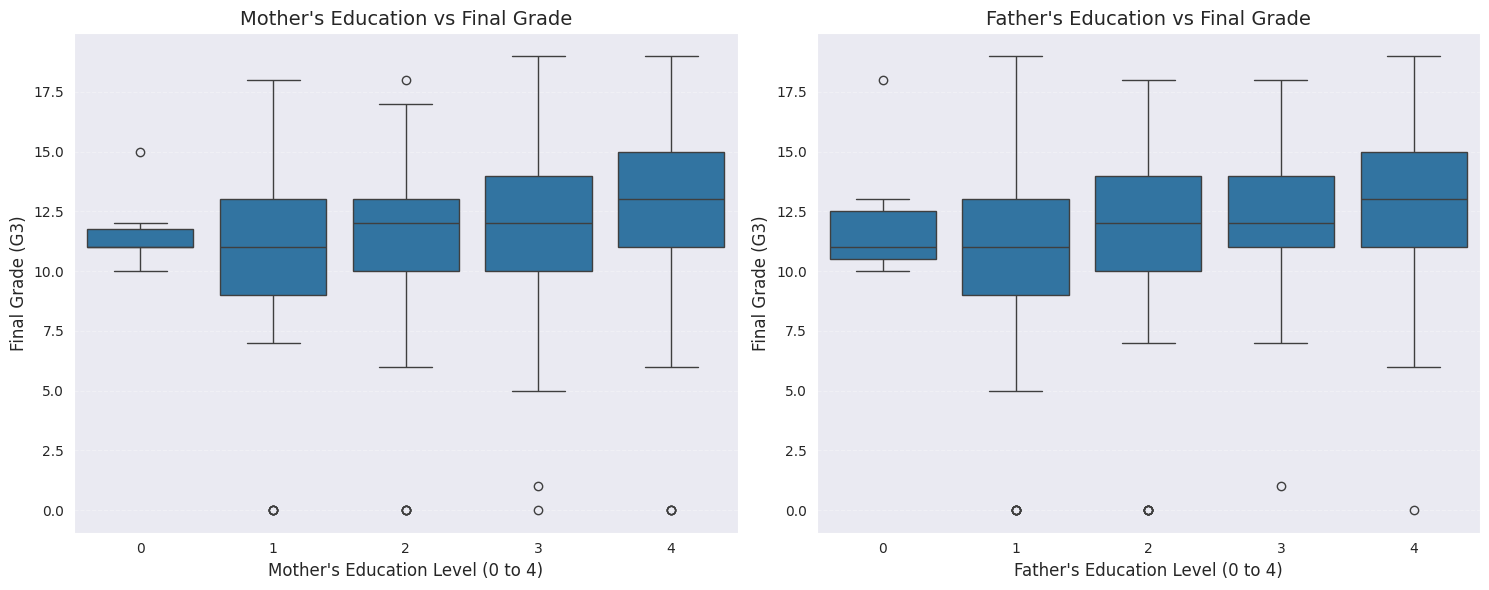

In [8]:
# Effect of mother's and father's education on grades
# This visualization consists of two side-by-side boxplots examining how parents' education levels relate to students' final grades.
# Left plot: Mother's education level vs. final grade (G3)
# Right plot: Father's education level vs. final grade (G3)
# 
# For both parents, education levels are coded from 0 to 4:
#   0: None
#   1: Primary education (4th grade)
#   2: 5th to 9th grade
#   3: Secondary education
#   4: Higher education
#
# The boxplots show:
#   - How the distribution of final grades varies across different parental education levels
#   - Whether higher parental education correlates with better student performance
#   - If mother's or father's education has different associations with academic outcomes
#
# This visualization helps understand the potential influence of family educational background on student achievement.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Medu', y='G3', data=data, ax=axes[0])
axes[0].set_title("Mother's Education vs Final Grade", fontsize=14)
axes[0].set_xlabel("Mother's Education Level (0 to 4)", fontsize=12)
axes[0].set_ylabel('Final Grade (G3)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

sns.boxplot(x='Fedu', y='G3', data=data, ax=axes[1])
axes[1].set_title("Father's Education vs Final Grade", fontsize=14)
axes[1].set_xlabel("Father's Education Level (0 to 4)", fontsize=12)
axes[1].set_ylabel('Final Grade (G3)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


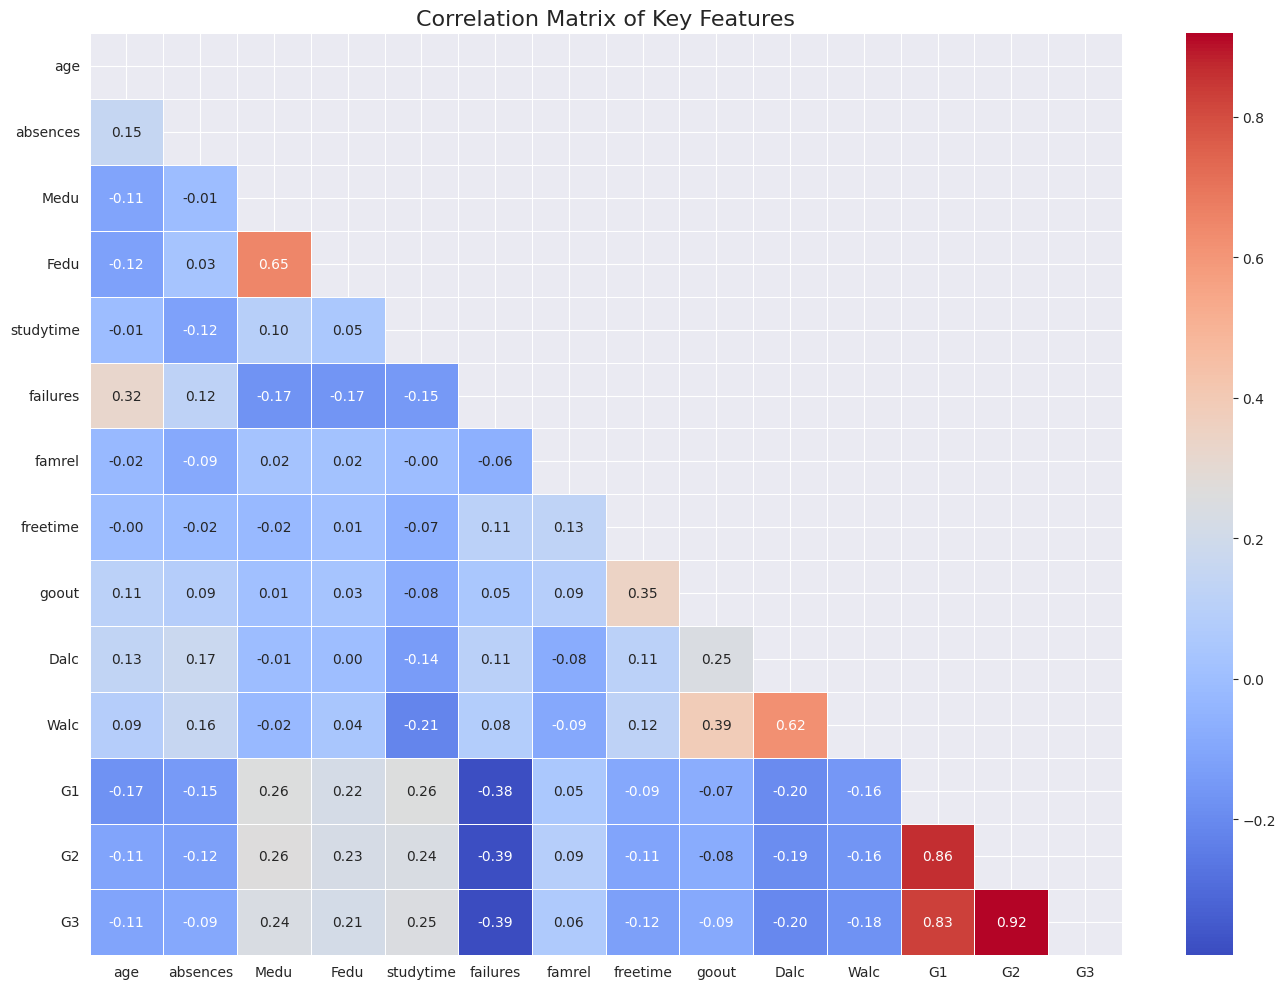

In [9]:
# Select important features
important_features = ['age', 'absences', 'Medu', 'Fedu', 'studytime',
                      'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'G1', 'G2', 'G3']

# Create correlation matrix
# This heatmap visualizes the correlation matrix between key features in the dataset.
# The visualization:
#   - Shows the strength and direction of relationships between pairs of variables
#   - Uses color coding (from cool to warm colors) to represent correlation coefficients
#   - Displays the exact correlation values in each cell
#   - Uses a triangular mask to avoid showing redundant information
#
# Strong positive correlations appear in dark red, while strong negative correlations appear in dark blue.
# Values closer to zero (lighter colors) indicate weaker relationships.
#
# Key insights from this visualization:
#   - How grades in different periods (G1, G2, G3) correlate with each other
#   - Which factors (study time, absences, etc.) have the strongest relationships with academic performance
#   - Potential multicollinearity between predictor variables
#
# This comprehensive view helps identify the most important factors affecting student performance.
plt.figure(figsize=(14, 10))
corr_matrix = data[important_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7134/2610718180.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='G3', data=data, palette='YlOrRd', ax=axes[0])
/tmp/ipykernel_7134/2610718180.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=data, palette='YlOrRd', ax=axes[1])


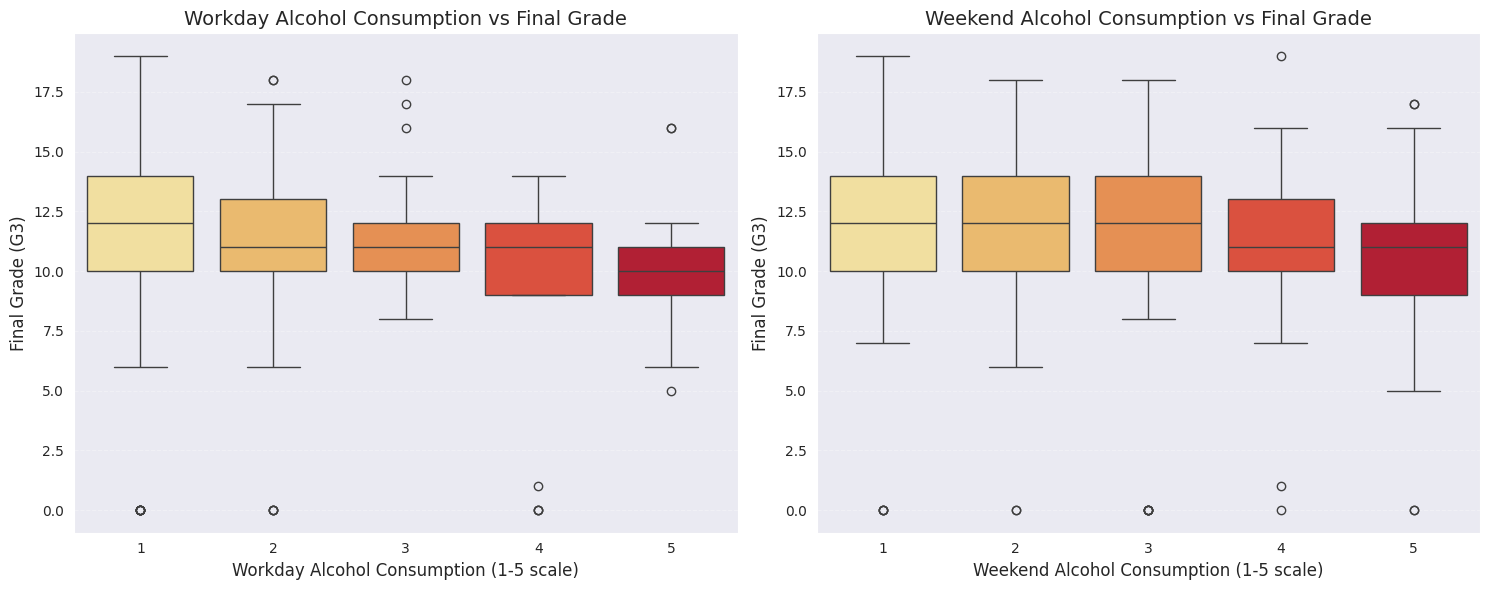

In [10]:
# Alcohol consumption impact on grades
# This visualization presents two boxplots examining the relationship between alcohol consumption and academic performance.
# Left plot: Workday alcohol consumption vs. final grade (G3)
# Right plot: Weekend alcohol consumption vs. final grade (G3)
#
# Alcohol consumption is measured on a scale from 1 to 5:
#   1: Very low
#   2: Low
#   3: Moderate
#   4: High
#   5: Very high
#
# The color gradient (yellow to red) visually reinforces the intensity of alcohol consumption.
#
# These boxplots reveal:
#   - How different levels of alcohol consumption correlate with academic performance
#   - Whether workday or weekend drinking has different associations with grades
#   - If there's a threshold where alcohol consumption begins to show stronger negative effects
#
# This visualization helps understand the potential impact of lifestyle choices on student achievement.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Dalc', y='G3', data=data, palette='YlOrRd', ax=axes[0])
axes[0].set_title('Workday Alcohol Consumption vs Final Grade', fontsize=14)
axes[0].set_xlabel('Workday Alcohol Consumption (1-5 scale)', fontsize=12)
axes[0].set_ylabel('Final Grade (G3)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

sns.boxplot(x='Walc', y='G3', data=data, palette='YlOrRd', ax=axes[1])
axes[1].set_title('Weekend Alcohol Consumption vs Final Grade', fontsize=14)
axes[1].set_xlabel('Weekend Alcohol Consumption (1-5 scale)', fontsize=12)
axes[1].set_ylabel('Final Grade (G3)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

/tmp/ipykernel_7134/4274938986.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='internet', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'salmon'})


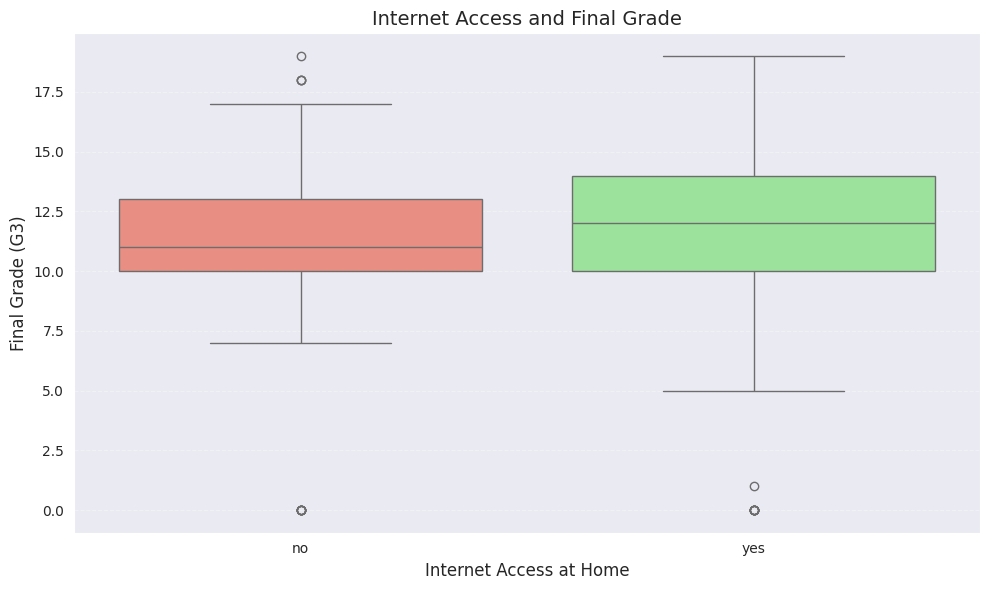

In [11]:
# Internet access impact
# This boxplot examines how internet access at home relates to students' final grades (G3).
# The visualization compares two groups:
#   - Students with internet access at home (yes)
#   - Students without internet access at home (no)
#
# The color coding (green for yes, salmon for no) provides visual distinction between the groups.
#
# The boxplot shows:
#   - Median grades for each group (horizontal line in the box)
#   - The interquartile range (the box itself)
#   - The range of grades (the whiskers)
#   - Any outliers (individual points)
#
# This visualization helps assess whether internet access at home is associated with academic performance,
# which has implications for digital divide issues and educational resource allocation.
plt.figure(figsize=(10, 6))
sns.boxplot(x='internet', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'salmon'})
plt.title('Internet Access and Final Grade', fontsize=14)
plt.xlabel('Internet Access at Home', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

/tmp/ipykernel_7134/496419664.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='schoolsup', y='G3', data=data, palette={'yes': 'lightblue', 'no': 'lightgray'}, ax=axes[0])
/tmp/ipykernel_7134/496419664.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='famsup', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'lightgray'}, ax=axes[1])


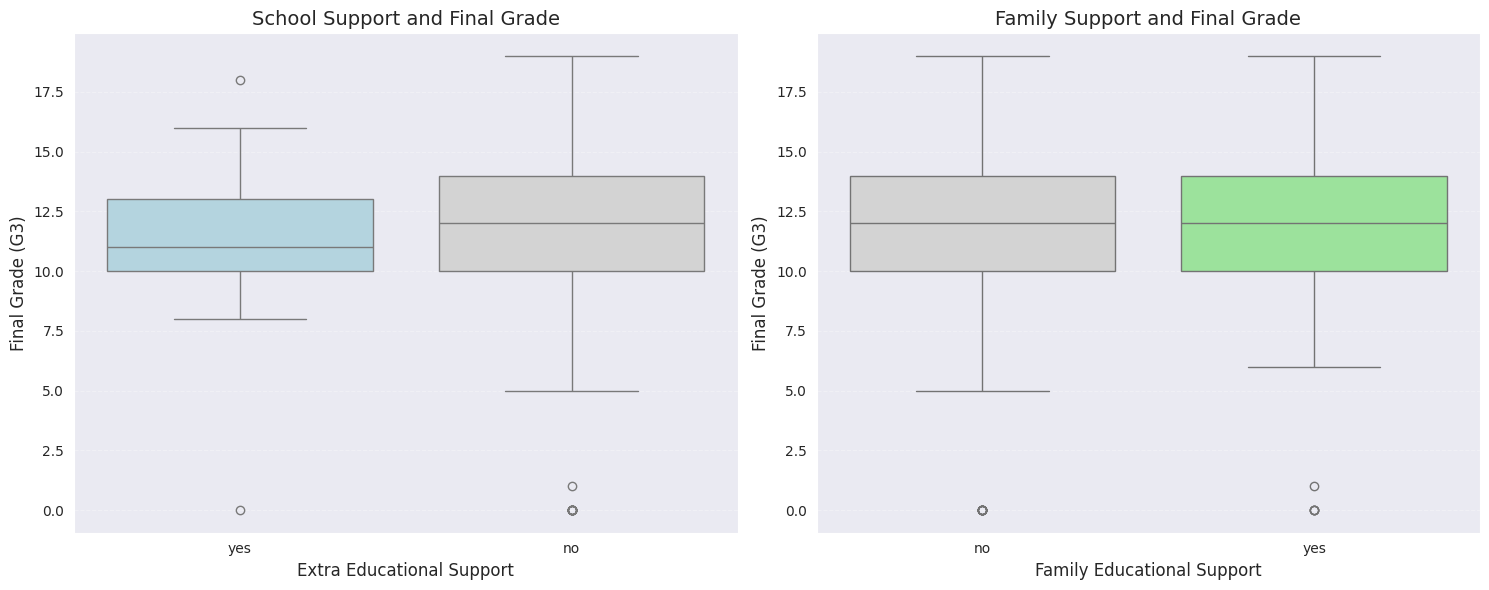

In [12]:
# Extra educational support impact
# This visualization presents two boxplots examining how different types of educational support relate to academic performance.
# Left plot: School support vs. final grade (G3)
# Right plot: Family support vs. final grade (G3)
#
# For both types of support, students are categorized into two groups:
#   - Those receiving extra educational support (yes)
#   - Those not receiving extra educational support (no)
#
# The color coding provides visual distinction between the groups:
#   - School support: blue (yes) vs. gray (no)
#   - Family support: green (yes) vs. gray (no)
#
# These boxplots reveal:
#   - Whether school-provided educational support is associated with different academic outcomes
#   - Whether family-provided educational support is associated with different academic outcomes
#   - Which type of support might have a stronger relationship with performance
#
# This visualization helps evaluate the effectiveness of different support systems and identify
# which students might benefit most from additional resources.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='schoolsup', y='G3', data=data, palette={'yes': 'lightblue', 'no': 'lightgray'}, ax=axes[0])
axes[0].set_title('School Support and Final Grade', fontsize=14)
axes[0].set_xlabel('Extra Educational Support', fontsize=12)
axes[0].set_ylabel('Final Grade (G3)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

sns.boxplot(x='famsup', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'lightgray'}, ax=axes[1])
axes[1].set_title('Family Support and Final Grade', fontsize=14)
axes[1].set_xlabel('Family Educational Support', fontsize=12)
axes[1].set_ylabel('Final Grade (G3)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

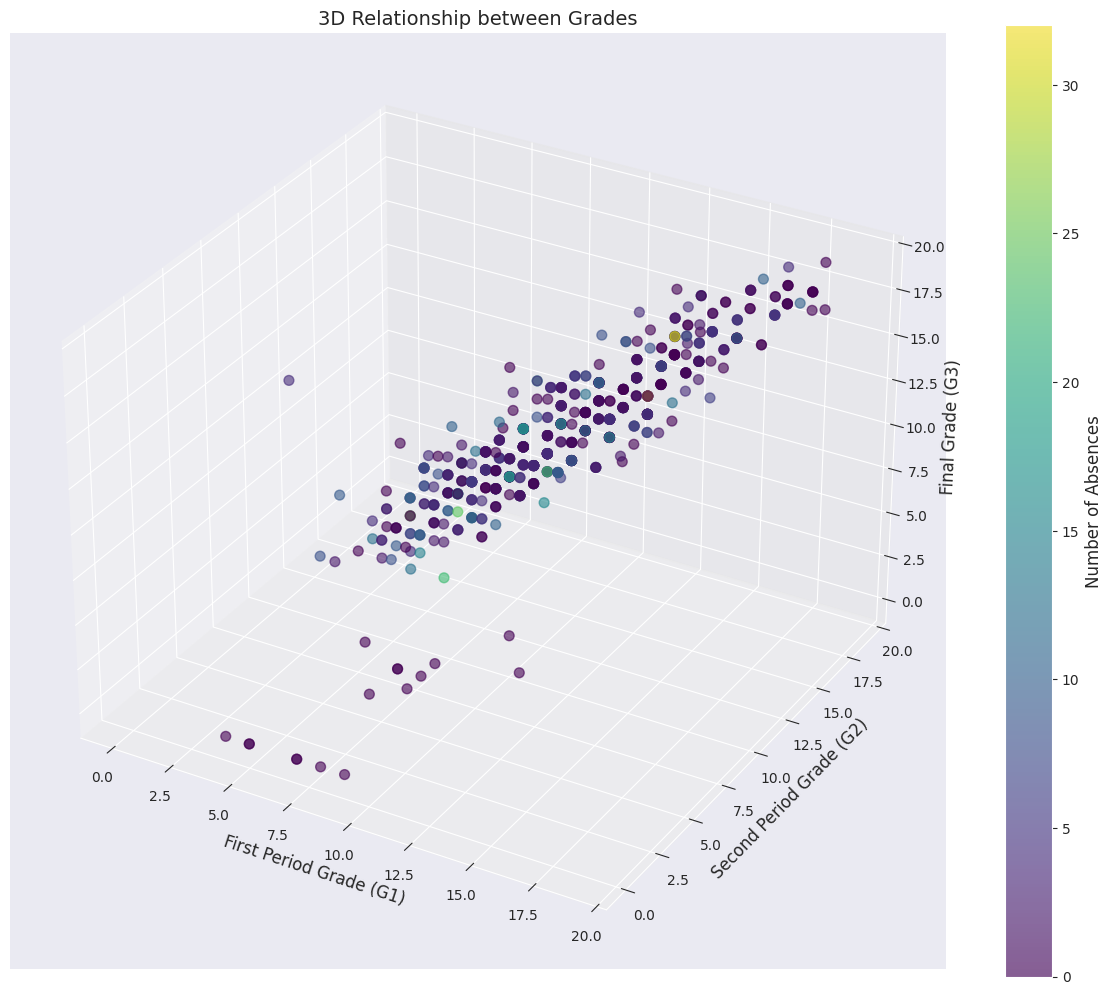

In [13]:
# 3D visualization with G1, G2, and G3
# This 3D scatter plot visualizes the relationships between all three grade periods simultaneously.
# Each point represents a student with:
#   - X-axis: First period grade (G1)
#   - Y-axis: Second period grade (G2)
#   - Z-axis: Final grade (G3)
#   - Color: Number of absences (represented by the color gradient)
#
# The 3D perspective allows for observing:
#   - The progression of grades across all three periods
#   - How early performance (G1, G2) predicts final outcomes (G3)
#   - The combined effect of absences on all three grade periods
#
# The colorbar on the right provides a scale for interpreting the number of absences.
#
# This advanced visualization offers a comprehensive view of student performance trajectories
# and helps identify patterns that might not be visible in 2D visualizations.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(data['G1'], data['G2'], data['G3'],
                    c=data['absences'], cmap='viridis',
                    s=50, alpha=0.6)

# Add colorbar to show absences values
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Absences', fontsize=12)

# Set labels
ax.set_xlabel('First Period Grade (G1)', fontsize=12)
ax.set_ylabel('Second Period Grade (G2)', fontsize=12)
ax.set_zlabel('Final Grade (G3)', fontsize=12)
ax.set_title('3D Relationship between Grades', fontsize=14)

plt.tight_layout()
plt.show()

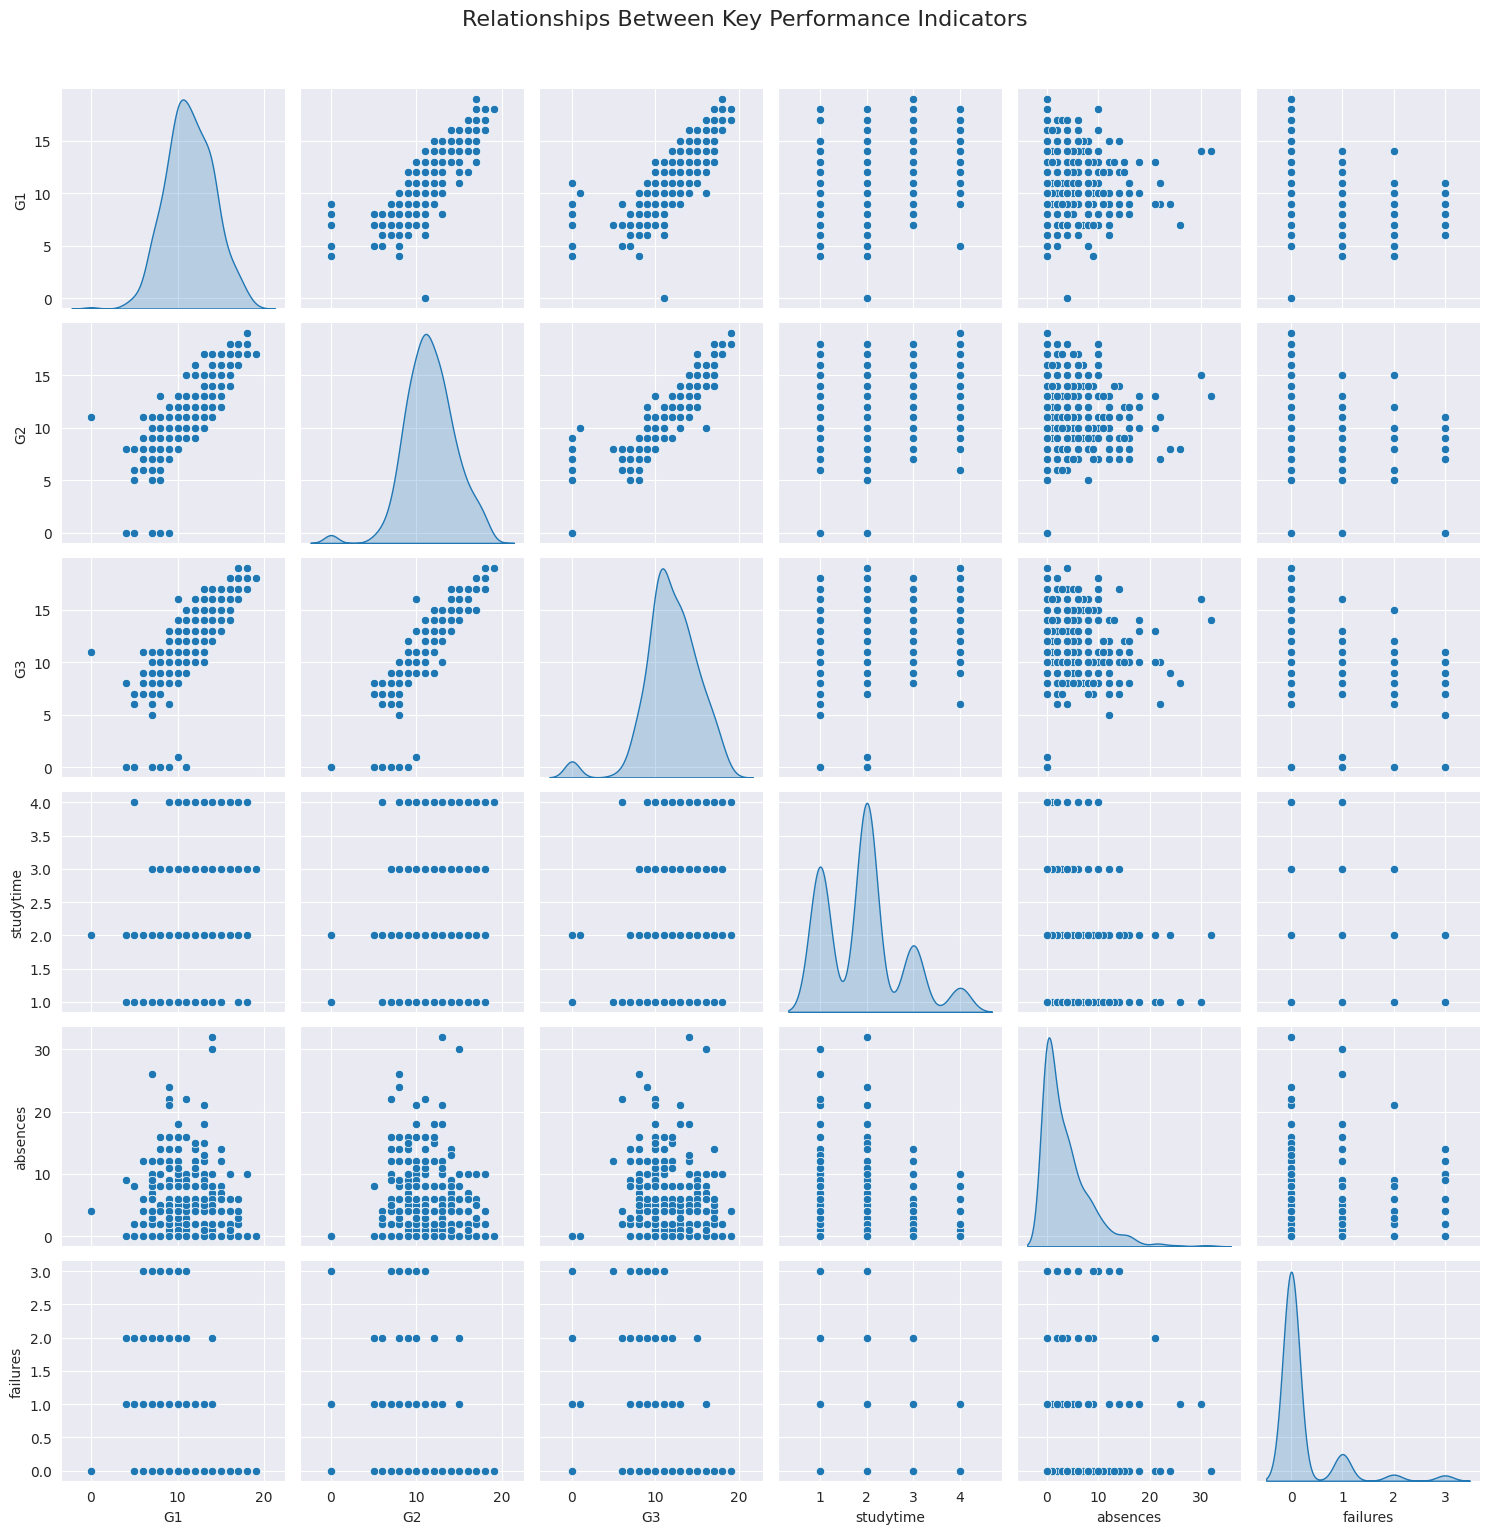

In [14]:
# Pairplot of key features
# This pairplot matrix provides a comprehensive view of relationships between six key performance indicators:
#   - G1: First period grade
#   - G2: Second period grade
#   - G3: Final grade
#   - studytime: Weekly study time (1-4 scale)
#   - absences: Number of school absences
#   - failures: Number of past class failures
#
# The visualization includes:
#   - Scatter plots for each pair of variables (off-diagonal)
#   - Kernel density estimation (KDE) plots showing the distribution of each variable (diagonal)
#
# This matrix allows for:
#   - Examining correlations between all pairs of variables simultaneously
#   - Identifying linear and non-linear relationships
#   - Detecting clusters or patterns in the data
#   - Understanding the distribution of each individual variable
#
# The pairplot provides a powerful overview of how these key factors interact with each other
# and with student performance, helping to identify the most important predictors of academic success.
key_features = ['G1', 'G2', 'G3', 'studytime', 'absences', 'failures']
sns.pairplot(data[key_features], diag_kind='kde')
plt.suptitle('Relationships Between Key Performance Indicators', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7134/206894634.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='higher', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'salmon'})


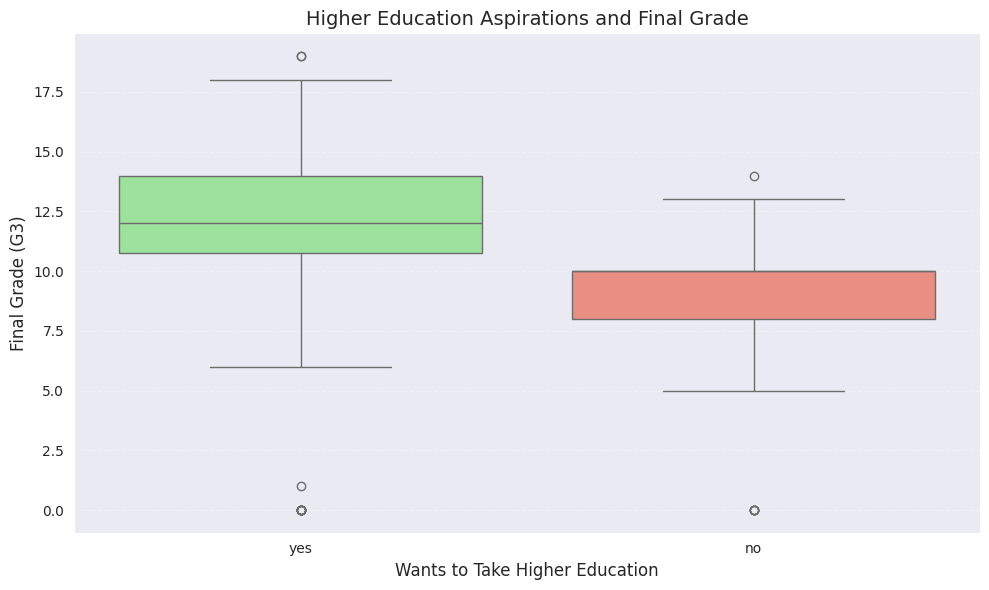

In [15]:
# Higher education aspirations and grades
# This boxplot examines the relationship between students' higher education aspirations and their final grades.
# The visualization compares two groups:
#   - Students who want to pursue higher education (yes)
#   - Students who don't want to pursue higher education (no)
#
# The color coding (green for yes, salmon for no) provides visual distinction between the groups.
#
# The boxplot shows:
#   - Median grades for each group (horizontal line in the box)
#   - The interquartile range (the box itself)
#   - The range of grades (the whiskers)
#   - Any outliers (individual points)
#
# This visualization helps understand:
#   - Whether academic aspirations correlate with current academic performance
#   - If students with higher education goals tend to perform better academically
#   - The potential motivational effect of future educational plans on current studies
#
# This insight is valuable for understanding student motivation and for developing targeted
# interventions to support students with different educational aspirations.
plt.figure(figsize=(10, 6))
sns.boxplot(x='higher', y='G3', data=data, palette={'yes': 'lightgreen', 'no': 'salmon'})
plt.title('Higher Education Aspirations and Final Grade', fontsize=14)
plt.xlabel('Wants to Take Higher Education', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [16]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13


In [17]:
columns = data.columns.values.tolist()
print(columns)

['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [18]:
# Get list of categorical columns (object type)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Columns that need label encoding:")
print(categorical_columns)

Columns that need label encoding:
['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [19]:
print("\nUnique values in each categorical column:")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


Unique values in each categorical column:
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [20]:
label_encoder = LabelEncoder()

# Create a copy of the dataframe to avoid modifying the original
data_encoded = data.copy()

# Apply label encoding to all categorical columns
for col in categorical_columns:
# Get numerical columns (non-categorical)
    data_encoded[col] = label_encoder.fit_transform(data[col])
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify the encoding worked
data_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False


In [21]:
# Define features (X) and target variable (y)
X = data_encoded.drop(['G3'], axis=1)  # G3 is the final grade (target)
X = data_encoded.copy()
y = data_encoded['G3']

# Let's also remove G1 and G2 as they are highly correlated with G3
# Remove the target variable (G3) from features
X = X.drop(['G3'], axis=1)

# Remove G1 and G2 as they are highly correlated with G3
# This makes the prediction more challenging but realistic
X = X.drop(['G1', 'G2'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but recommended for many algorithms)
# Standardize only numerical features
# Get numerical columns (excluding one-hot encoded columns)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Filter out binary columns (one-hot encoded) from scaling
numerical_cols = [col for col in numerical_cols if len(X[col].unique()) > 2]

# Apply scaling only to non-binary numerical columns
scaler = StandardScaler()
# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# Apply scaling only to numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [22]:
# Import necessary models and evaluation metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return {
        'Model': type(model).__name__,
        'Aaccuracy': model.score(X_test, y_test),
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Training Time (s)': training_time
    }

# Create a list of models to evaluate
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    SVR(kernel='rbf'),
    KNeighborsRegressor(n_neighbors=5)
]

# Evaluate each model and store results
results = []
for model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(result)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')  # Sort by RMSE
results_df

,Model,Aaccuracy,RMSE,MAE,R²,Training Time (s)
2,Lasso,0.200056,2.792997,2.079919,0.200056,0.017003
3,RandomForestRegressor,0.187015,2.815671,2.045615,0.187015,0.537686
4,GradientBoostingRegressor,0.178462,2.830443,2.121991,0.178462,0.166334
1,Ridge,0.172192,2.841223,2.138901,0.172192,0.007870
5,SVR,0.171332,2.842699,2.067513,0.171332,0.024899
0,LinearRegression,0.167499,2.849265,2.148152,0.167499,0.014025
6,KNeighborsRegressor,0.129873,2.912942,2.100000,0.129873,0.003305


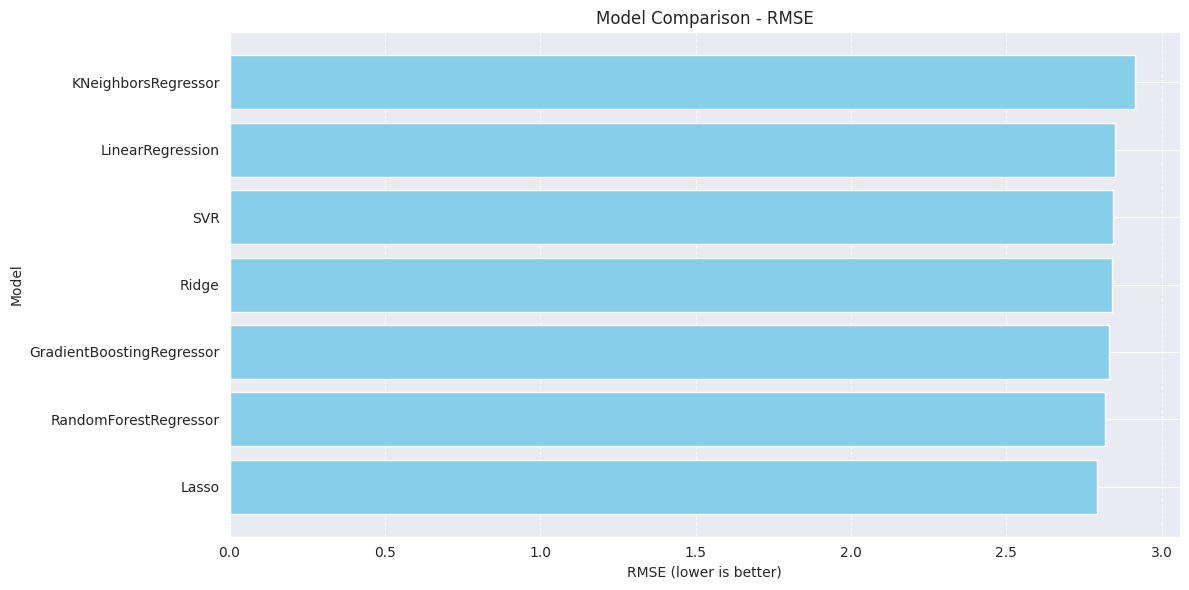

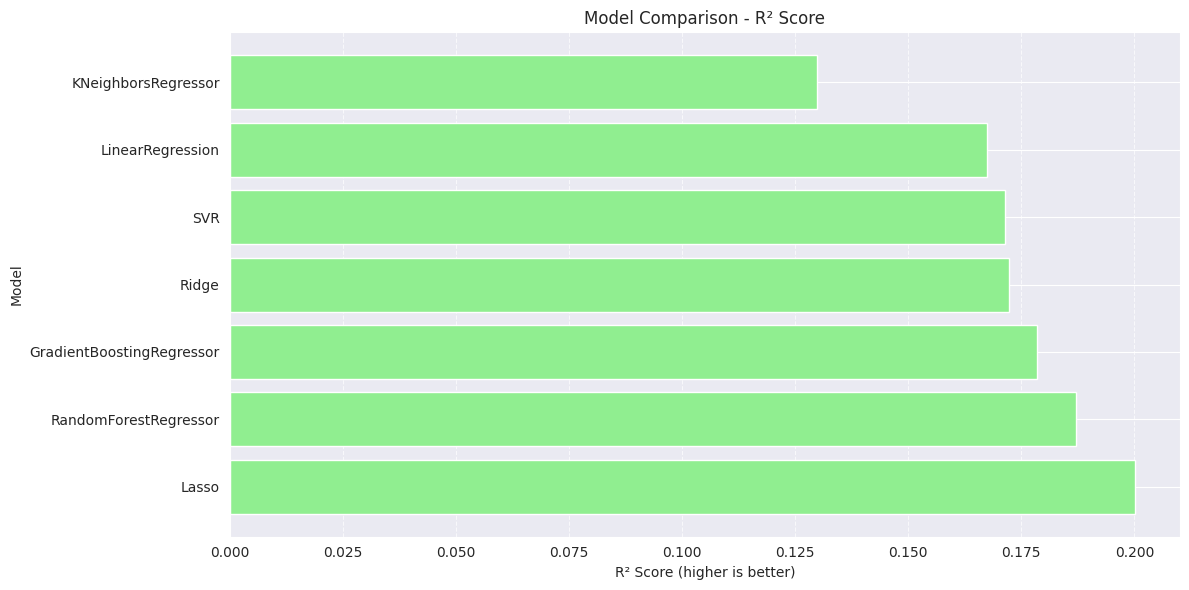

In [23]:
# Model comparison visualizations
# These two bar charts compare the performance of different machine learning models for predicting student grades.
#
# First chart: Root Mean Square Error (RMSE) comparison
# - RMSE measures the average magnitude of prediction errors (lower is better)
# - The horizontal bars show how much each model's predictions deviate from actual grades
# - Shorter bars indicate more accurate models
#
# Second chart: R² Score comparison
# - R² measures how well the model explains the variance in the data (higher is better)
# - The horizontal bars show the proportion of variance explained by each model
# - Longer bars indicate models that better capture the patterns in the data
#
# Together, these visualizations help:
# - Identify which models perform best for predicting student grades
# - Compare the trade-offs between different algorithms
# - Select the most appropriate model for educational performance prediction
#
# The models being compared include linear models (LinearRegression, Ridge, Lasso),
# ensemble methods (RandomForest, GradientBoosting), support vector machines (SVR),
# and instance-based learning (KNeighborsRegressor).
#
# Bar chart for RMSE (lower is better)
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE (lower is better)')
plt.ylabel('Model')
plt.title('Model Comparison - RMSE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart for R² (higher is better)
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R²'], color='lightgreen')
plt.xlabel('R² Score (higher is better)')
plt.ylabel('Model')
plt.title('Model Comparison - R² Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()